## Lesson 11 Matplotlib ##

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


#### Import The Data Set ####

In [2]:
housing_df = pd.read_csv('housing_data.csv')
housing_df.head(10)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
5,5,SC50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,No,MnPrv,Shed,700,Oct,2009,WD,Normal,143000
6,6,SC20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,307000
7,7,SC60,RL,0.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,No,No,Shed,350,Nov,2009,WD,Normal,200000
8,8,SC50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2008,WD,Abnorml,129900
9,9,SC190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jan,2008,WD,Normal,118000


#### 1. Create a line plot to visualize the trend of house prices over the years. ####

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64
Index is: Int64Index([2006, 2007, 2008, 2009, 2010], dtype='int64', name='YrSold')


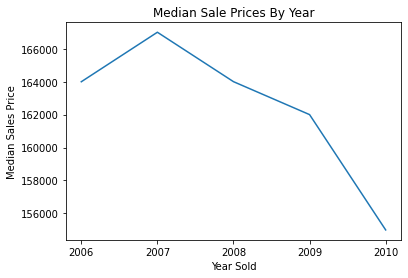

In [18]:
# Group by year and calculate median house prices
# YrSold becomes the index into the series SalePrices
yearly_prices = housing_df.groupby('YrSold')['SalePrice'].median()
print(yearly_prices)

print(f'Index is: {yearly_prices.index}')

# Set the title and axis
plt.title('Median Sale Prices By Year')
plt.xlabel('Year Sold')
plt.ylabel('Median Sales Price')

# Plot the line plot
plt.plot(yearly_prices.index.astype(str), yearly_prices.values)
plt.show()

In [35]:
#### 2. Scatter plot: LotArea vs SalePrice ####

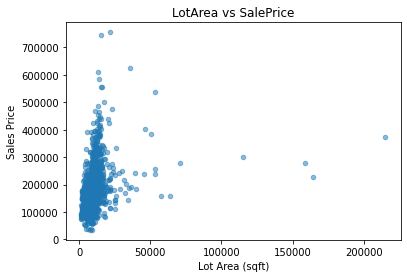

In [36]:
# Set the title and axis
plt.title('LotArea vs SalePrice')
plt.xlabel('Lot Area (sqft)')
# plt.xscale('log') 
plt.ylabel('Sales Price')

# Create Scatter plot
# alpha - adds shading to points
plt.scatter(housing_df['LotArea'], housing_df['SalePrice'], s=20, alpha=0.5)
plt.show()

#### 3. Bar chart: house count by neighborhood ####

Blueste      2
NPkVill      9
Veenker     11
BrDale      16
Blmngtn     17
MeadowV     17
SWISU       25
StoneBr     25
ClearCr     28
IDOTRR      37
Timber      38
NoRidge     41
Mitchel     49
Crawfor     51
BrkSide     58
SawyerW     59
NWAmes      73
Sawyer      74
NridgHt     77
Gilbert     79
Somerst     86
Edwards    100
OldTown    113
CollgCr    150
NAmes      225
Name: Neighborhood, dtype: int64


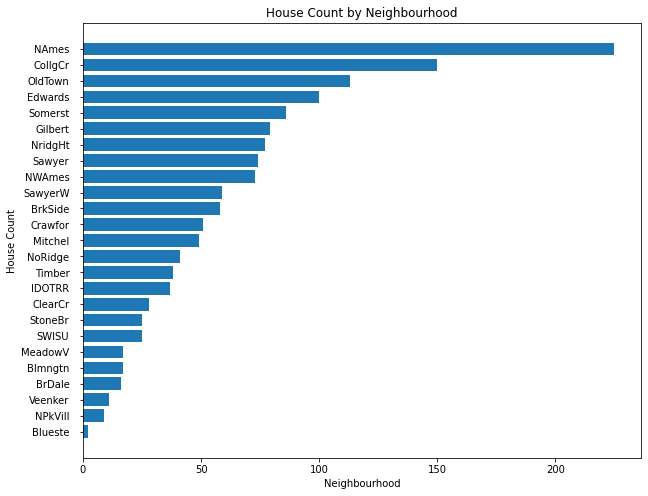

In [40]:
# Create the plot series
neighbourhood_counts = housing_df['Neighborhood'].value_counts().sort_values(ascending=True)
print(neighbourhood_counts)

# increase the image size
plt.figure(figsize=(10, 8))  

# Set the title and axis
plt.title('House Count by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('House Count')

# Create Chart
# Pass in the series index field as x axis, counts as y axis from series
plt.barh(neighbourhood_counts.index, neighbourhood_counts.values)
plt.tick_params(axis='y', pad=10)  # increase padding between labels and axis
plt.show()


#### 4. Box plot: SalePrice distribution by neighborhood for top 10 neighbourhoods

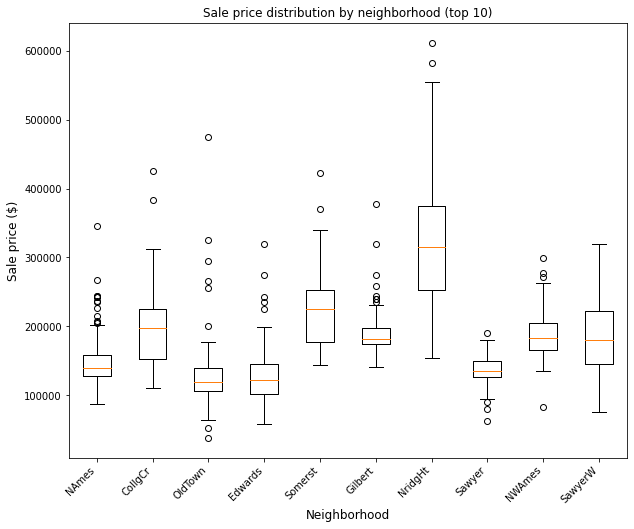

In [46]:
# Get top 10 neighborhoods by count for better visualization
top_neighborhoods = housing_df['Neighborhood'].value_counts().head(10).index
df_top = housing_df[housing_df['Neighborhood'].isin(top_neighborhoods)]

# Prepare data for box plot
neighborhoods_list = []
prices_list = []

for neighborhood in top_neighborhoods:
    prices = df_top[df_top['Neighborhood'] == neighborhood]['SalePrice'].values
    neighborhoods_list.append(neighborhood)
    prices_list.append(prices)

# increase the image size
plt.figure(figsize=(10, 8))  
    
# Create box plot
plt.title('Sale price distribution by neighborhood (top 10)')
plt.boxplot(prices_list, labels=neighborhoods_list)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Sale price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

#### 5. Pie chart: proportion of houses by MSZoning ####

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


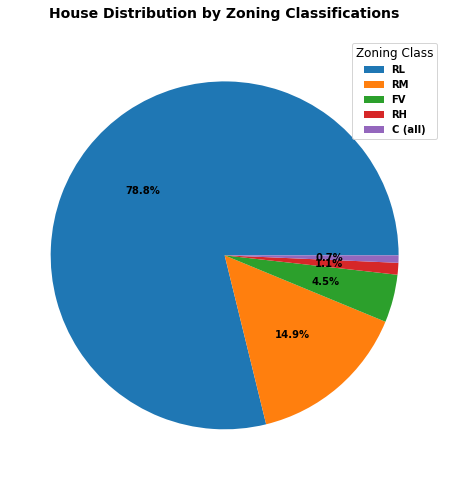

In [58]:
zoning_counts = housing_df['MSZoning'].value_counts()
print(zoning_counts)


# increase the image size
plt.figure(figsize=(10, 8))  

# Display the pie
plt.title('House Distribution by Zoning Classifications',
          fontweight='bold', 
          fontsize=14, 
          pad=20)

plt.pie(zoning_counts.values, 
        labels=None, 
        autopct='%1.1f%%',
        textprops={'fontweight': 'bold'})

plt.legend(title='Zoning Class', 
           title_fontsize=12, 
           fontsize=10,
           labels=zoning_counts.index,
           prop={'weight': 'bold'})
plt.show()


#### 6. 3D scatter plot: LotArea, OverallQual, and SalePrice #####

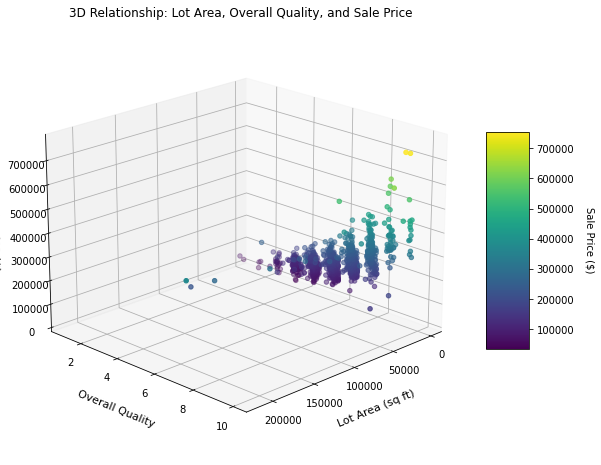

In [60]:
# increase the image size
plt.figure(figsize=(10, 8))  

# Create 3D scatter plot
ax = plt.axes(projection='3d')

ax.set_title('3D Relationship: Lot Area, Overall Quality, and Sale Price')

# Create scatter plot with color based on SalePrice
scatter = ax.scatter(
    housing_df['LotArea'], 
    housing_df['OverallQual'], 
    housing_df['SalePrice'],
    c=housing_df['SalePrice'], 
    cmap='viridis'
)

# Add labels and title
ax.set_xlabel('Lot Area (sq ft)', fontsize=11, labelpad=10)
ax.set_ylabel('Overall Quality', fontsize=11, labelpad=10)
ax.set_zlabel('Sale Price ($)', fontsize=11, labelpad=10)

# Add color bar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Sale Price ($)', rotation=270, labelpad=20, fontsize=10)

# Adjust viewing angle
ax.view_init(elev=20, azim=45)

plt.show()